## Outliers

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframe
import pandas as pd

# Statistics.
import scipy.stats as ss

There are not many definitions of outliers. It is often easier to say what is not an outlier

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
random.normal(loc=0.0, scale=1.0, size=None)

## The Normal distribution - Scaling
***

LaTeX programming for mathematical notation. 
Double dollar signs centre the display
Single dollar signs leave the display inline


$ \frac{1}{2} $

$ \frac{1}{\sqrt{2 \pi \sigma^{2}}} $

$$ \frac{1}{\sqrt{2 \pi \sigma^2 }} $$


In [2]:
np.pi

3.141592653589793

In [3]:
np.sqrt(2)
# both calculations give you irrational numbers, 
# they cannot be described by one number divided by another and have infinite decimal places

1.4142135623730951

In [4]:
1.0**2
# **2 > squared
# important to be explicit with integers and floating points. Better to use 1.0 than 1

1.0

In [5]:
sigma = 1.0
sigma

1.0

In [6]:
1.0 / np.sqrt(2 *np.pi * sigma**2)

0.3989422804014327

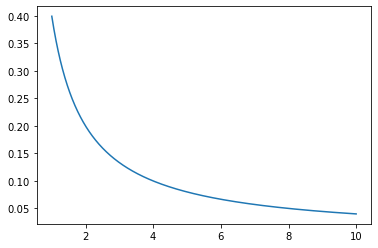

In [7]:
sigma_vals = np.linspace(1.0, 10.0, 1000) 
#  see the fencepost error, off by one error

plt.plot(sigma_vals, 1.0 / np.sqrt(2 * np.pi * sigma_vals**2));

## The Normal Distribution - the $e^x$ part

$$ e^x $$

$$ e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

Fix $\mu$ and $\sigma$ and vary x

In [8]:
np.e
# Euler's number, used a lot in compound interest. How often do you want to compound, keep compouding and you get e
# A mathematical constant. 

2.718281828459045

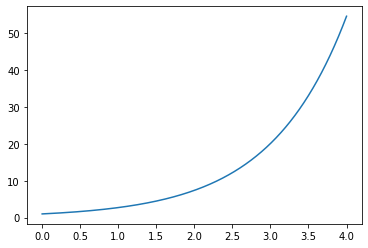

In [9]:
# Range of x values for plotting.
x = np.linspace(0.0, 4.0, 1000)

# Plot of e^x - built into numpy as np.exp.
plt.plot(x, np.exp(x));

# when x is 1, you get e 

Break down the formula into parts
$$ e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

Let $\mu$ = 0 and $\sigma$ = 1, 

$$ e^{-\frac{(x - 0)^2}{2(1)^2}} $$

$$ e^{-\frac{(x)^2}{2}} $$


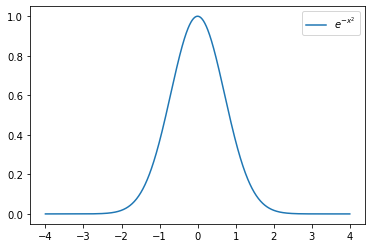

In [10]:
# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# e to the minus x squared. 
plt.plot(x, np.exp(-(x**2)), label=r'$e^{-x^2}$') # use r for LaTeX in pyplot

# Absolute legend.
plt.legend();

Negative values when squared are positive so reflect the positive values squared. The curve peaks at 1 because e<sup>0</sup> = 1

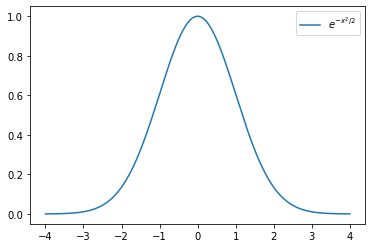

In [11]:
# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# e to the minus x squared and divided by 2
plt.plot(x, np.exp(-(x**2 / 2)), label=r'$e^{-x^2/2}$') 

# Absolute legend.
plt.legend();

The curve seems to have widened when $e^{-x^2}$ is divided by 2

Now replace 0 for $\mu$ and 1 for $\sigma$ in the statement and supply these values to numpy. 

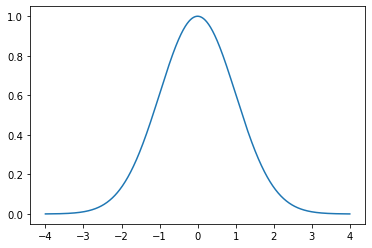

In [12]:
# These are involved in the exponent.
mu, sigma = 0.0, 1.0

# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# Plot of full e part of normal pdf.
plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))));

Changing the value of $\mu$ changes the position of the peak of the curve. Hence in `random.normal(loc=0.0, scale=1.0, size=None)`, *loc* denotes the position of the tip of the curve. 

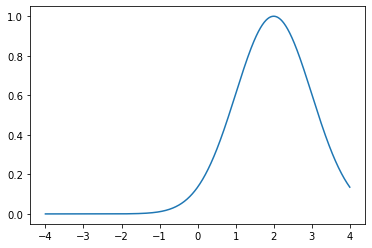

In [13]:
# These are involved in the exponent.
mu, sigma = 2.0, 1.0

# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# Plot of full e part of normal pdf.
plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))));

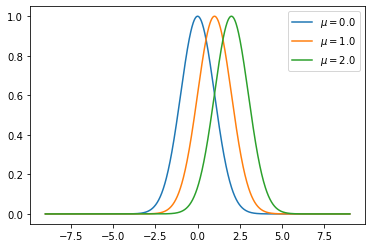

In [14]:
# These are involved in the exponent.
mu, sigma = 2.0, 1.0

# Range of x values.
x = np.linspace(-9.0, 9.0, 1000)

for mu in [0.0, 1.0, 2.0]: 
# Plot of full e part of normal pdf.
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\mu = {mu}$');

# Plot legend
plt.legend()


Changing the value of $\sigma$ changes the width/spread of the curve.

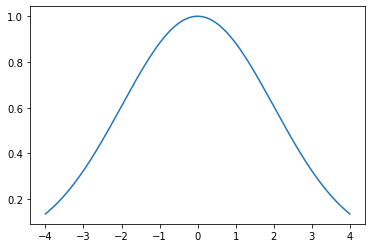

In [15]:
# These are involved in the exponent.
mu, sigma = 0.0, 2.0

# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# Plot of full e part of normal pdf.
plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))));

Changing the value of $\sigma$ changes the width/spread of the curve.
Hence in `random.normal(loc=0.0, scale=1.0, size=None)`, *scale* denotes $\sigma$

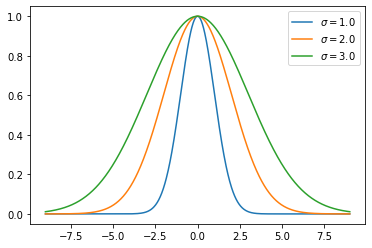

In [16]:
# These are involved in the exponent.
mu, sigma = 0.0, 2.0

# Range of x values.
x = np.linspace(-9.0, 9.0, 1000)

for sigma in [1.0, 2.0, 3.0]: 
# Plot of full e part of normal pdf.
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\sigma = {sigma}$');
    
plt.legend();

### Normal distribution altogether

$$ \frac{1}{\sqrt{2 \pi \sigma^2 }} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$


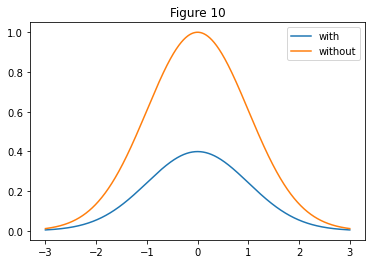

In [17]:
# Set mu and sigma.
mu, sigma = 0.0, 1.0

# Range of x values.
x = np.linspace(-3.0, 3.0, 1000)

# First part, with the square root.
part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
# Second part, with the e.
part2 = np.exp(-((x - mu)**2 / (2 * sigma**2)))
# The output is the product.
y = part1 * part2

# Plot x and y.
plt.plot(x, y, label='with')
# Show without scaling by first part.
plt.plot(x, part2, label='without')
plt.title("Figure 10")
plt.legend();

The effect of part 1 is that is 'squishes' the orange curve so that the area of the blue curve is under 1. When you integrate the blue curve, the area will be under 1. Why would you want an area of under 1? 

Something with the probability of 1 is always going to happen.

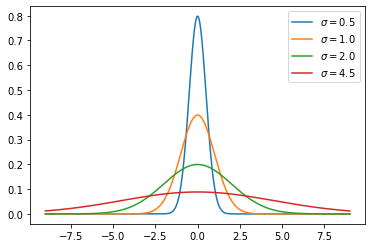

In [18]:
# Changing values of sigma.
# Note that sigma occurs in part 1 and part 2.
# So, the height of the curve is also affected.

# Set initial mu and sigma.
mu, sigma = 0.0, 1.0

# Range of x values.
x = np.linspace(-9.0, 9.0, 1000)

# Different values of sigma.
for sigma in [0.5, 1.0, 2.0, 4.5]:
    # First part, with the square root.
    part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
    # Second part, with the e.
    part2 = np.exp(-((x - mu)**2 / (2 * sigma**2)))
    # The output is the product.
    y = part1 * part2
    # Plot x and y.
    plt.plot(x, y, label=rf'$\sigma = {sigma}$')

plt.legend();

## Percentiles

Standard Normal distribution will never be 0 - continuous probability distribution but there is a chance that you will get extreme random values e.g. from a sample of 1,000,000 values with $\mu$ = 0 and $\sigma$ = 1.0, you could get 100 as a random value and it wouldn't be an outlier. 

Use Scipy for a more indepth look at the Normal distribution 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [19]:
# Picking random values on the curve.
np.random.normal(0.0, 1.0)

0.06243592606833446

In [20]:
# Picking random values on the curve - the max of 1000000.
# Would you describe it as an outlier?
np.random.normal(0.0, 1.0, 1000000).max()

5.383570058860891

In [21]:
#Call the scipy norm and use ppf > Percent point function (inverse of cdf — percentiles).
ss.norm().ppf(0.99)

2.3263478740408408

0.99 or the 99th percentile indicates that 99% of the blue curve in Figure 10, is to the left of the 2.326. 
If you select a number randomly from this distribution, you have a 99% chance that it is going to be less than 2.326. 


Scipy.norm Methods

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm

Percent point function (inverse of cdf — percentiles).
`ppf(q, loc=0, scale=1)` where q is the lower tail probability
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.ppf.html


Cumulative distribution function.
`cdf(x, loc=0, scale=1)` when you have a value and you want to know what percentile it falls 

See the different plots for pdf and cdg https://en.wikipedia.org/wiki/Normal_distribution

In [22]:
#Try cdf, take a percentile i.e. a value between 0 and 1
ss.norm().cdf(0.5)

0.6914624612740131

In [23]:
# The probability of generating a value less than 3.0 and greater than -3.0. 
# Cdf is the accumulation of probabilities moving across the x axis
ss.norm().cdf(3.0) - ss.norm().cdf(-3.0)

0.9973002039367398

In this instance, where $\mu$ = 0 and $\sigma$ = 1.0, the statement is asking for 3 standard deviations away from the mean. 

This always gives 99%. The criterion for a cut off when looking for an effect in statistics. 

Default settin for $\mu$ = 0 and $\sigma$ = 1.0


In [24]:
# Six sigma, where sigma is 1.0 and mu is 0.0.
ss.norm().cdf(6.0) - ss.norm().cdf(-6.0)

0.9999999980268246

Considered rock solid...approaching 100%

## Quartiles
***
Useful way of dividing into ranges. 
Four regions dividing up by 3 values. 

In [25]:
# 3rd quartile - the 75th percentile.
ss.norm().ppf(0.75)

0.6744897501960817

In [26]:
# 2nd quartile - the 50th percentile.
ss.norm().ppf(0.5)

0.0

In [27]:
# 1st quartile - the 25th percentile.
ss.norm().ppf(0.25)

-0.6744897501960817

## Box Plots
***
Create box plots found on Wikipedia using Python. https://en.wikipedia.org/wiki/Box_plot Box plot on Wikipedia created using R. 

Good source of datasets which are built into R https://vincentarelbundock.github.io/Rdatasets/articles/data.html

In [28]:
# Read in the morley data.
data = np.genfromtxt('data/morley.csv', skip_header=1, delimiter=',', deletechars='"')

# Remove the first column.
data = data[:,1:] #array within an array. First : > take everything, second 1: > skip first column
data

array([[1.00e+00, 1.00e+00, 8.50e+02],
       [1.00e+00, 2.00e+00, 7.40e+02],
       [1.00e+00, 3.00e+00, 9.00e+02],
       [1.00e+00, 4.00e+00, 1.07e+03],
       [1.00e+00, 5.00e+00, 9.30e+02],
       [1.00e+00, 6.00e+00, 8.50e+02],
       [1.00e+00, 7.00e+00, 9.50e+02],
       [1.00e+00, 8.00e+00, 9.80e+02],
       [1.00e+00, 9.00e+00, 9.80e+02],
       [1.00e+00, 1.00e+01, 8.80e+02],
       [1.00e+00, 1.10e+01, 1.00e+03],
       [1.00e+00, 1.20e+01, 9.80e+02],
       [1.00e+00, 1.30e+01, 9.30e+02],
       [1.00e+00, 1.40e+01, 6.50e+02],
       [1.00e+00, 1.50e+01, 7.60e+02],
       [1.00e+00, 1.60e+01, 8.10e+02],
       [1.00e+00, 1.70e+01, 1.00e+03],
       [1.00e+00, 1.80e+01, 1.00e+03],
       [1.00e+00, 1.90e+01, 9.60e+02],
       [1.00e+00, 2.00e+01, 9.60e+02],
       [2.00e+00, 1.00e+00, 9.60e+02],
       [2.00e+00, 2.00e+00, 9.40e+02],
       [2.00e+00, 3.00e+00, 9.60e+02],
       [2.00e+00, 4.00e+00, 9.40e+02],
       [2.00e+00, 5.00e+00, 8.80e+02],
       [2.00e+00, 6.00e+0

Column 3 are the speed of light measurements which are on the box plot on Wikipedia
https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/morley.html

In [29]:
# Select the data for the first experiment
exper_1 = data[:20, 2] # first 20 rows and variable 2 (in position 3)
exper_1

array([ 850.,  740.,  900., 1070.,  930.,  850.,  950.,  980.,  980.,
        880., 1000.,  980.,  930.,  650.,  760.,  810., 1000., 1000.,
        960.,  960.])

In [30]:
# Select the data for the second experiment
exper_2 = data[20:40, 2] # first 20 rows and variable 2 (in position 3)
exper_2

array([960., 940., 960., 940., 880., 800., 850., 880., 900., 840., 830.,
       790., 810., 880., 880., 830., 800., 790., 760., 800.])

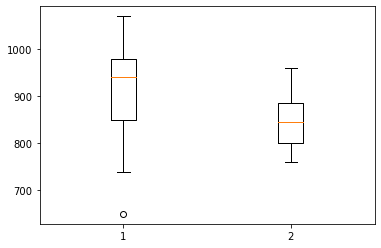

In [31]:
# Create a box plot of 2 experiments
plt.boxplot(np.array([exper_1, exper_2]).T); #creates a new numpy area, wrapped in a list to create a new array. 
# exper_1 and exper_2 is row 1 and row 2 but matplot lib wants it the other way around so use .T to transpose

In [32]:
# A quick way to get the five experiments
data[:,2].reshape(5,20).T

array([[ 850.,  960.,  880.,  890.,  890.],
       [ 740.,  940.,  880.,  810.,  840.],
       [ 900.,  960.,  880.,  810.,  780.],
       [1070.,  940.,  860.,  820.,  810.],
       [ 930.,  880.,  720.,  800.,  760.],
       [ 850.,  800.,  720.,  770.,  810.],
       [ 950.,  850.,  620.,  760.,  790.],
       [ 980.,  880.,  860.,  740.,  810.],
       [ 980.,  900.,  970.,  750.,  820.],
       [ 880.,  840.,  950.,  760.,  850.],
       [1000.,  830.,  880.,  910.,  870.],
       [ 980.,  790.,  910.,  920.,  870.],
       [ 930.,  810.,  850.,  890.,  810.],
       [ 650.,  880.,  870.,  860.,  740.],
       [ 760.,  880.,  840.,  880.,  810.],
       [ 810.,  830.,  840.,  720.,  940.],
       [1000.,  800.,  850.,  840.,  950.],
       [1000.,  790.,  840.,  850.,  800.],
       [ 960.,  760.,  840.,  850.,  810.],
       [ 960.,  800.,  840.,  780.,  870.]])

## The Interquartile range
A boxplot is a standardized way of displaying the dataset based on the five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

https://en.wikipedia.org/wiki/Box_plot#Elements

In [33]:
exper_1

array([ 850.,  740.,  900., 1070.,  930.,  850.,  950.,  980.,  980.,
        880., 1000.,  980.,  930.,  650.,  760.,  810., 1000., 1000.,
        960.,  960.])

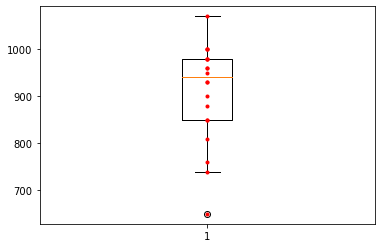

In [34]:
# Create a figure.
fig, ax = plt.subplots()

# Add the boxplot.
ax.boxplot(exper_1)

# Plots red dots at (1, value) for each value in exper_1.
# https://numpy.org/doc/stable/reference/generated/numpy.ones.html
ax.plot(np.ones(exper_1.shape), exper_1, 'r.');

In [35]:
# Median
np.sort(exper_1)

array([ 650.,  740.,  760.,  810.,  850.,  850.,  880.,  900.,  930.,
        930.,  950.,  960.,  960.,  980.,  980.,  980., 1000., 1000.,
       1000., 1070.])

What is the median of a dataset? The middle value of a dataset. 
Half the values in a dataset are below the median and half the values are above the median. 
The median is the 50th percentile, 50% the numbers are below the 50th percentile
Also known as **Q2**

In [36]:
# Median of exper_1. Indicated by orange line on the box plot. 
np.median(exper_1)

940.0

In [37]:
# The median is the 50th percentile
np.percentile(exper_1, 50)

940.0

In [38]:
# Mean of exper_1 - three wayss
exper_1.mean(), np.mean(exper_1), sum(exper_1) / len(exper_1)

(909.0, 909.0, 909.0)

In [39]:
# Upper quartile value. 
q3 = np.percentile(exper_1, 75)
q3

980.0

In [40]:
# Median of top half of the values
np.median(np.sort(exper_1)[10:])

980.0

The 75th percentile and the median of the top half of the dataset coincide

Also known as **Q3** or upper quartile

In [41]:
# Lower quartile value. 
q1 = np.percentile(exper_1, 25)
q1

850.0

In [42]:
# Median of lower half of the values
np.median(np.sort(exper_1)[:10])

850.0

The 25th percentile and the median of the lower half of the dataset coincide

Also known as **Q1** or lower quartile

In [43]:
# Inter-quartile range
# iqr = np.percentile(exper_1, 75) - np.percentile(exper_1, 25)
iqr = q3 - q1
iqr

130.0

In [44]:
# Max 
Max = q3 + iqr
Max

1110.0

In [45]:
# Min 
Min = q1 - iqr
Min

720.0

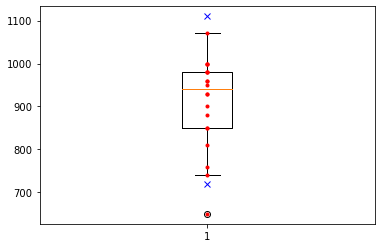

In [46]:
# Create a figure.
fig, ax = plt.subplots()

# Add the boxplot.
ax.boxplot(exper_1)

# Plots red dots at (1, value) for each value in exper_1.
ax.plot(np.ones(exper_1.shape), exper_1, 'r.')

# Add the max whisker lengths.
ax.plot([1.0, 1.0], [q1 - (iqr), q3 + (iqr)], 'bx'); # Should the iqr be multiplied by 1.5? 

The outlier is beyond 1.5 times the IQR of this dataset. 

## Exercise 1
***

Create box plots on a single set of axes for all five experiments in the Morley data set.



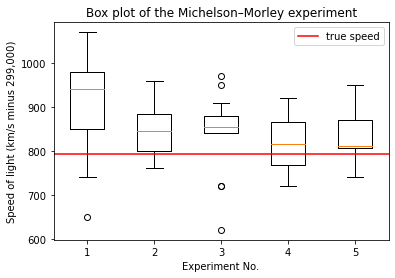

In [47]:
# Read in the morley data.
data = np.genfromtxt('data/morley.csv', skip_header=1, delimiter=',', deletechars='"')

# Remove the first column.
data = data[:,1:] 

# A quick way to get the five experiments
tdata = data[:,2].reshape(5,20).T

# Select the data for the first experiment
exp_1 = tdata[:20, 0]

# Select the data for the second experiment
exp_2 = tdata[:20, 1]

# Select the data for the third experiment
exp_3 = tdata[:20, 2]

# Select the data for the fourth experiment
exp_4 = tdata[:20, 3]

# Select the data for the fifth experiment
exp_5 = tdata[:20, 4]


# Create a box plot of 5 experiments
plt.boxplot(np.array([exp_1, exp_2, exp_3, exp_4, exp_5]).T); 

# Specifying horizontal line for true speed of light 
# Speed of light = 299,792.458 km/s - 299,000 km/s)
plt.axhline(y = 792.458, color = 'r', linestyle = '-', label = 'true speed');

# label the plot
# https://www.w3schools.com/python/matplotlib_labels.asp
plt.title("Box plot of the Michelson–Morley experiment");
plt.xlabel("Experiment No.");
plt.ylabel("Speed of light (km/s minus 299,000)");
plt.legend(); #https://stackoverflow.com/questions/31950456/python-axhline-label-not-showing-up-in-plot

## Exercise 2
***

Create box plots for all of the numercial variables in Fisher's Iris Data Set.

In [48]:
# Read in Fisher's Iris data set
from fileinput import filename
# The original dataset was found to have a number of errors and has been updated by Bezdek et al.
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data'
# Read in the data to a dataframe
df = pd.read_csv(filename, names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


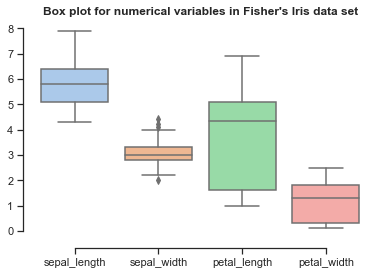

In [49]:
# Use seaborn to create box plots from the dataframe
sns.set_theme(style="ticks", palette="pastel") # configure plot style
sns.boxplot(data=df) # create box plot from dataframe
plt.title("Box plot for numerical variables in Fisher's Iris data set", weight = "bold") # Title for the plot
sns.despine(offset=10, trim=True) # removes top and right spines from the plot
plt.show() # show plot

## A Data set

In [72]:
# Create a series of x vectors.
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(1,10)])
print(xs)

[[ 1.          1.10526316  1.21052632  1.31578947  1.42105263  1.52631579
   1.63157895  1.73684211  1.84210526  1.94736842  2.05263158  2.15789474
   2.26315789  2.36842105  2.47368421  2.57894737  2.68421053  2.78947368
   2.89473684  3.        ]
 [ 2.          2.10526316  2.21052632  2.31578947  2.42105263  2.52631579
   2.63157895  2.73684211  2.84210526  2.94736842  3.05263158  3.15789474
   3.26315789  3.36842105  3.47368421  3.57894737  3.68421053  3.78947368
   3.89473684  4.        ]
 [ 3.          3.10526316  3.21052632  3.31578947  3.42105263  3.52631579
   3.63157895  3.73684211  3.84210526  3.94736842  4.05263158  4.15789474
   4.26315789  4.36842105  4.47368421  4.57894737  4.68421053  4.78947368
   4.89473684  5.        ]
 [ 4.          4.10526316  4.21052632  4.31578947  4.42105263  4.52631579
   4.63157895  4.73684211  4.84210526  4.94736842  5.05263158  5.15789474
   5.26315789  5.36842105  5.47368421  5.57894737  5.68421053  5.78947368
   5.89473684  6.        ]
 [ 5

In [83]:
# Create a corresponding series of y vectors.
ys = np.array([-1.0 * xs[i] + 2 * i for i in range(len(xs))])

# Add some noise.
ys = ys + np.random.normal(0.0, 1.0, ys.shape)

print(ys)

[[-0.84766077 -0.57209029 -2.71135473 -1.09029832  0.06176081 -2.21598024
  -1.6967513  -2.11255896 -1.16649428 -2.87376022 -1.27857733 -2.03737838
  -1.64267599 -1.15105783 -2.47527584 -4.15590615 -1.37956472 -3.30132292
  -2.26319575 -2.68691192]
 [ 1.2810236   1.24004684  0.08850085 -0.92394802 -0.55339662 -0.45711871
  -0.2473025  -2.21000408 -1.21785745 -1.35959688 -1.40297908  0.02564625
   0.61915013 -0.6513351  -1.07031437 -0.91096099 -0.47840734 -1.18318153
  -1.7552002  -3.07137214]
 [ 0.77605964  2.56964994  0.60845656  0.12419223  1.45528975  0.17360743
  -1.12539546  0.16383003  0.4871611  -1.20030611 -0.41038845  0.56407857
   0.04268515  0.11838976  0.46691262  0.46584805 -0.48487024 -0.64599527
  -2.68966529 -0.85041467]
 [ 2.67535335  0.9527672   1.43365056  1.13398531  1.53474541  1.33731166
   0.73026186  0.91430774  1.2755242   0.93197335  0.88440929 -0.63018697
   0.38370267  2.77120583  1.70913594  1.60409721  0.88482129  1.3961407
   0.18980195 -1.00048173]
 [ 3.

In [84]:
# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()

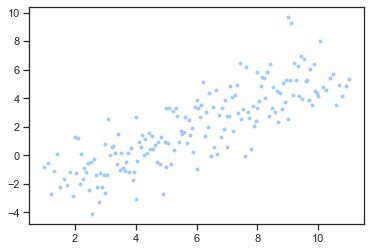

In [85]:
# Plot.
plt.plot(x, y, '.');

## Line of best fit


$ y = mx + c$

Measure vertical distance of each of the points to the line of best fit. Easier to measure vertical than perpendicular. 
Assume the error is in the y values, not the x values


In [54]:
# Best fit line slope and y intercept.
m, c = np.polyfit(x, y, 1)

In [59]:
# Create a steadily increasing x range for plotting.
xbestfit = np.linspace(x.min(), x.max(), 1000)

# Create corresponding y values form best fit line.
ybestfit = m * (xbestfit) + c

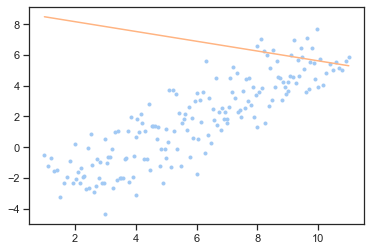

In [60]:
# Plot points.
plt.plot(x, y, '.')

# Plot line.
plt.plot(xbestfit, ybestfit);

The trend of the plot seems that the data goes from bottom to top. 

Removing the outlier could impact on the best fit line because we square the distance. The effect of the outlier 3 units away from line is much larger than the value 1 unit away from line when we square the distance. 

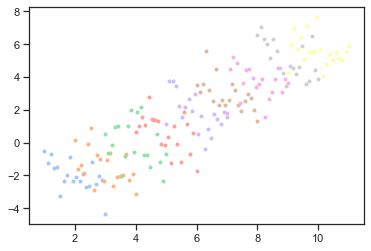

In [57]:
# Plot the same points, but now with a different colour for each range.
for i in range(len(xs)):
    plt.plot(xs[i], ys[i], '.')

The data points belong to different categories. There is a 3rd variable at play. There is segmenting which was not obvious in the first plot when the data was combined 
In second plot, it becomes apparent that there is an inverse relationship at play which was not obvious when the data was combined 
Simpson's paradox, a cautionary tale regarding outliers. 


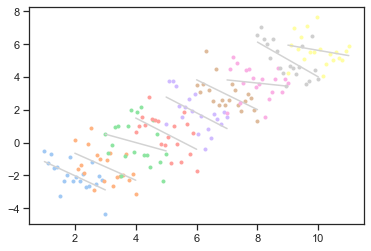

In [58]:
# Same plot but with best fit lines for each category.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot(xbestfit, ybestfit, color='lightgrey');

See [Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox).

## Exercise 3
***
Adapt the above code and plots so that the overall plot is inversely proportional and the individual groups are directly proportional.